In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#import pydotplus
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv", delimiter=",")
df.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz),missile
0,89.010147,0.0,2.051400,2.660000e-25,3.804121,9.190000e-25,agm86c
1,90.546584,0.5,1.734656,2.213781e-03,3.744950,4.226930e-04,agm86c
2,93.680049,1.0,1.272543,1.269226e-02,3.539431,5.275043e-03,agm86c
3,91.802465,1.5,1.544475,2.268877e-02,3.547722,6.401292e-03,agm86c
4,95.582702,2.0,0.975898,6.333399e-02,3.229333,3.343697e-02,agm86c


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Angle                722 non-null    float64
 1   Azimuth              722 non-null    float64
 2   H RCS (f = 180 MHz)  722 non-null    float64
 3   H RCS (f = 350 MHz)  722 non-null    float64
 4   V RCS (f=180 MHz)    722 non-null    float64
 5   V RCS (f=350 MHz)    722 non-null    float64
 6   missile              722 non-null    object 
dtypes: float64(6), object(1)
memory usage: 39.6+ KB


In [5]:
df.columns

Index(['Angle', 'Azimuth', 'H RCS (f = 180 MHz)', 'H RCS (f = 350 MHz)',
       'V RCS (f=180 MHz)', 'V RCS (f=350 MHz)', 'missile'],
      dtype='object')

In [6]:
df.missile.unique()

array(['agm86c', 'kepd350'], dtype=object)

In [7]:
X = df.drop(['missile'], axis=1)
y = df['missile']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train.shape, X_test.shape

((483, 6), (239, 6))

In [9]:
X_train.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz)
42,93.579190,21.0,3.555251,1.564884,20.340526,0.125035
73,96.863598,36.5,0.649556,2.337733,16.967664,2.320665
167,93.422450,83.5,0.356577,0.086764,3.756759,0.014718
250,89.308655,125.0,0.303236,0.077204,6.884478,0.214986
631,92.530441,135.0,4.263225,1.605771,1.122514,0.057594


In [10]:
X_test.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz)
336,95.168060,168.0,6.037746,2.336418,17.540357,0.093433
516,96.359754,77.5,4.834882,0.901656,9.310164,0.984244
552,93.384332,95.5,21.390854,0.277159,1.563715,0.178914
33,91.207098,16.5,2.929826,1.078598,19.699535,0.074136
558,91.889125,98.5,6.404130,0.166498,1.212775,0.212532


In [11]:
#criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
clf_gini.fit(X_train,y_train)
y_pred_gini = clf_gini.predict(X_test)

In [12]:

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0:4f}', format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}', format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: {0:0:4f} 0.8451882845188284
Training-set accuracy score: {0:0.4f} 0.9130434782608695


<function matplotlib.pyplot.show(close=None, block=None)>

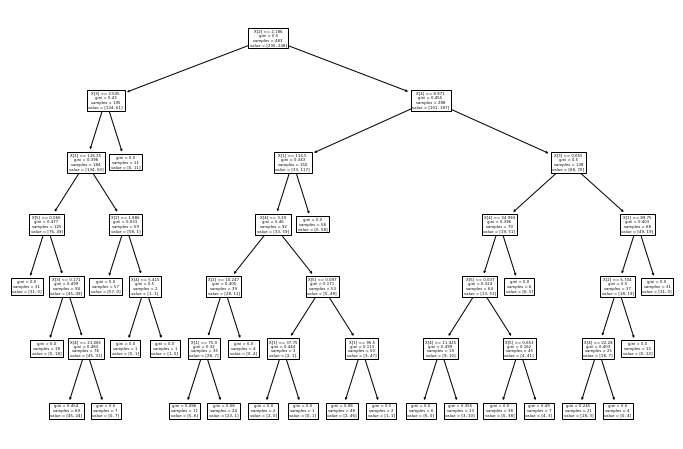

In [13]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show

In [14]:
features = ['Angle','Azimuth','H RCS (f = 180 MHz)','H RCS (f = 350 MHz)','V RCS (f=180 MHz)','V RCS (f=350 MHz)']
classnames = ['agm86c','kepd350']

tree.export_graphviz(clf_gini,
                     out_file="treegini.dot",
                     feature_names = features, 
                     class_names=classnames,
                     filled = True)
#dot -Tpng tree.dot -o tree.png
#in anaconda prompt to convert tree.dot into tree.png

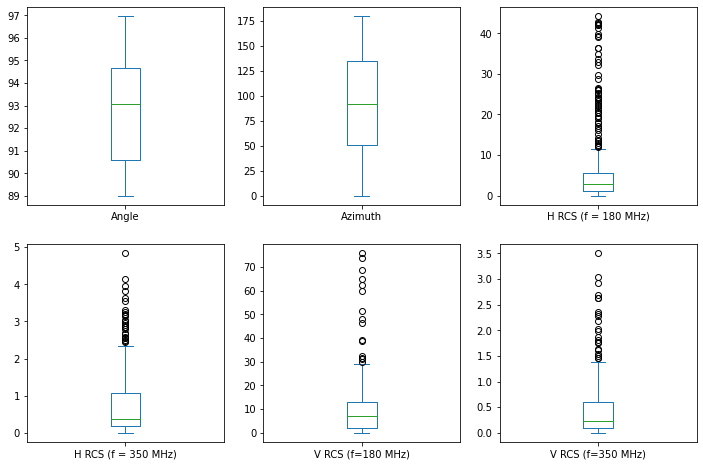

In [15]:
#wtf
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,8))
plt.show()

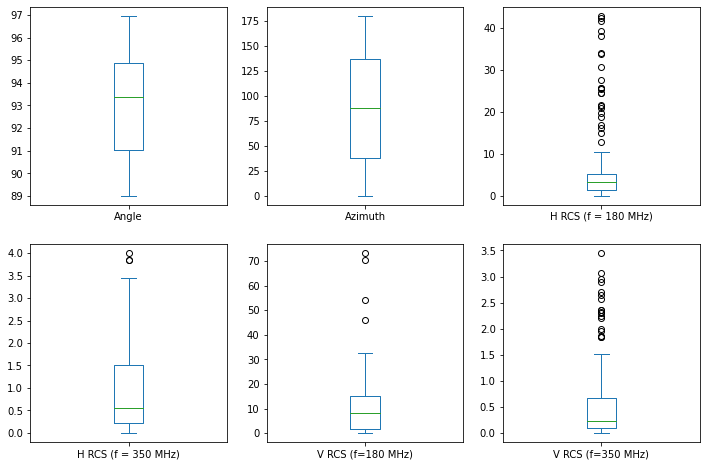

In [16]:
#wtf
X_test.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,  figsize=(12,8))
plt.show()

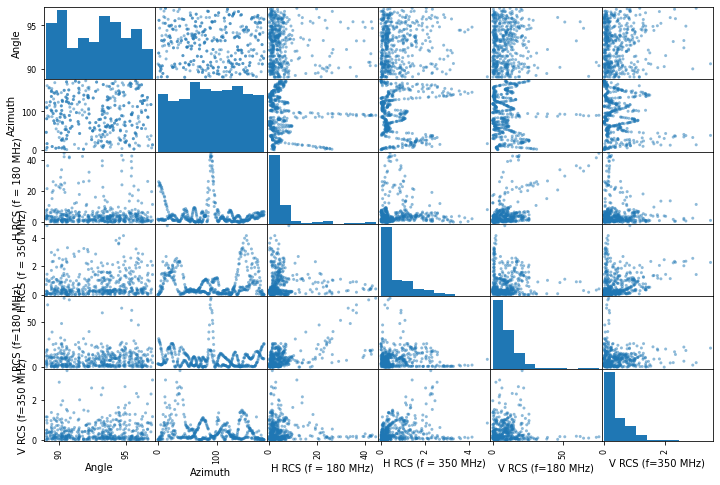

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(12,8))
plt.show()

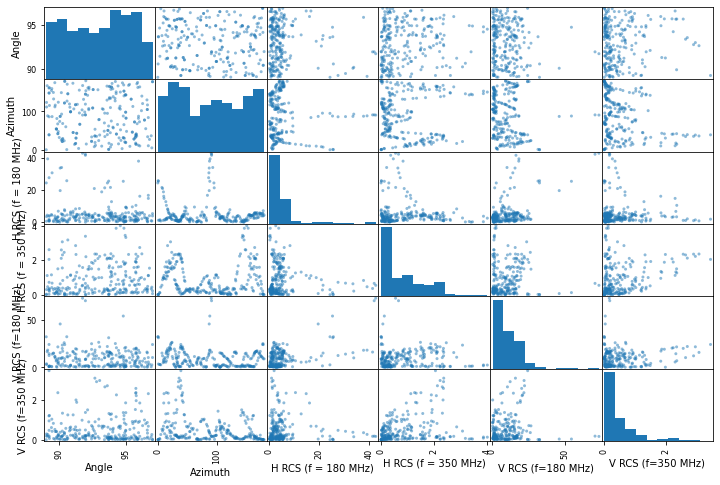

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_test, figsize=(12,8))
plt.show()

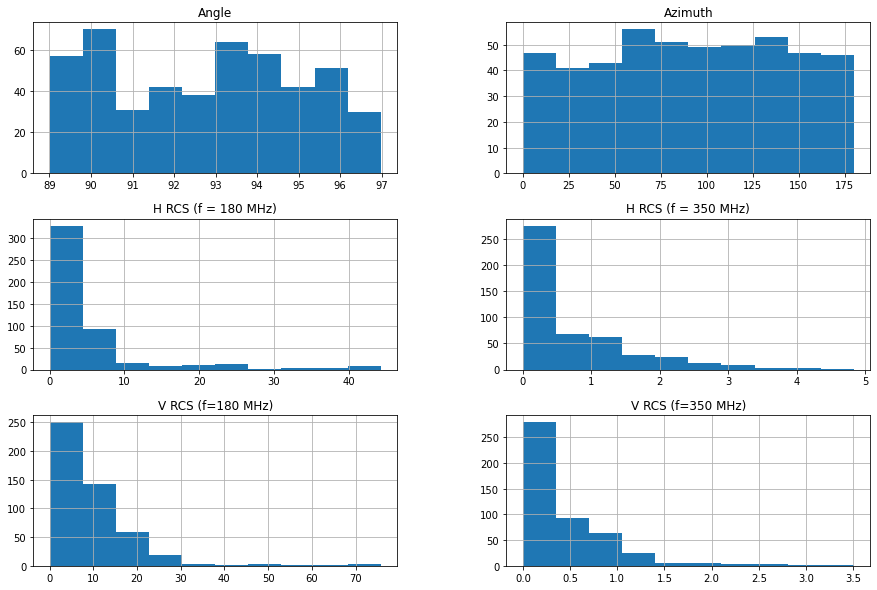

In [20]:
X_train.hist(figsize=(15,10))
plt.show()

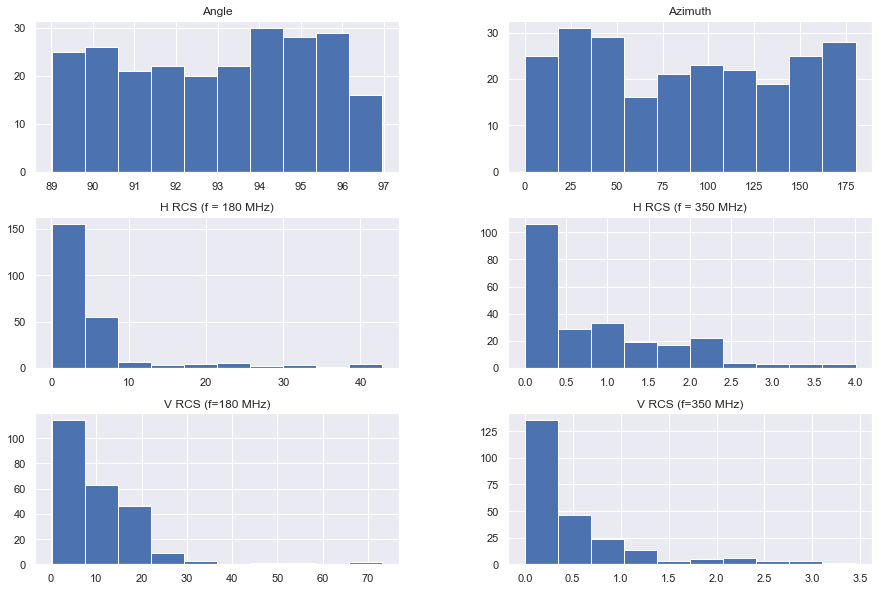

In [ ]:
X_test.hist(figsize=(15,10))
plt.show()

In [ ]:
#criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.8201
Training-set accuracy score: 0.9048


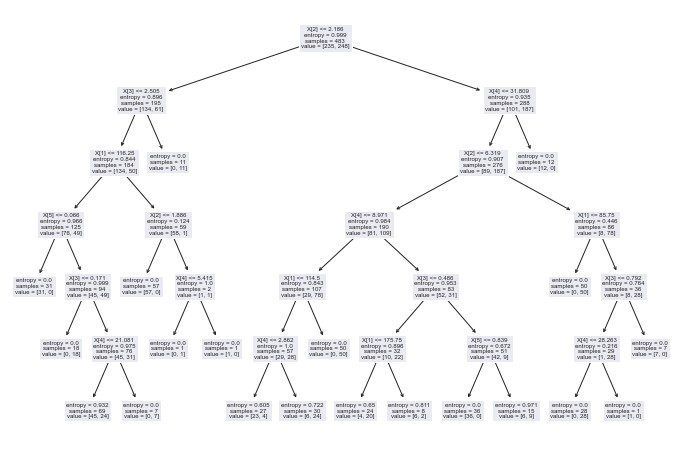

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

In [ ]:

tree.export_graphviz(clf_en,
                     out_file="tree.dot",
                     feature_names = features, 
                     class_names=classnames,
                     filled = True)
#dot -Tpng tree.dot -o tree.png
#in anaconda prompt to convert tree.dot into tree.png

In [ ]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred_en)
cfm

array([[106,  20],
       [ 23,  90]], dtype=int64)

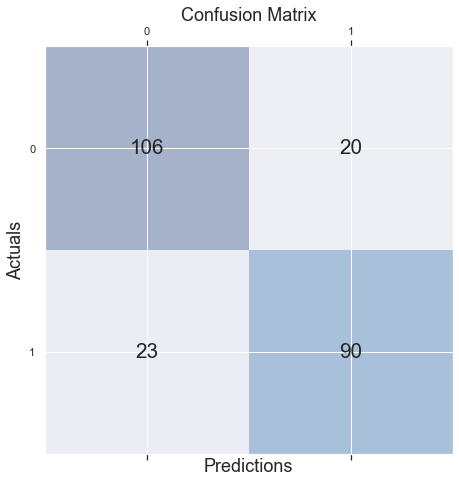

In [ ]:
from sklearn.metrics import  confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_en)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
       print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100) 
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Entropy Criterion is Better and it has accuracy equal to  90.47619047619048


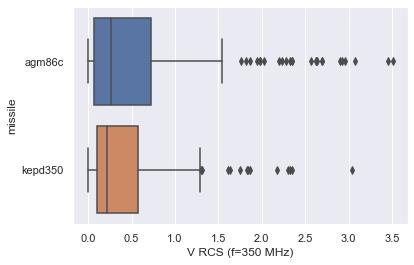

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y= "missile", x="V RCS (f=350 MHz)", data = df)
plt.show()

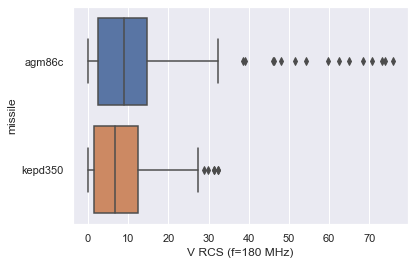

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y= "missile", x="V RCS (f=180 MHz)", data = df)
plt.show()

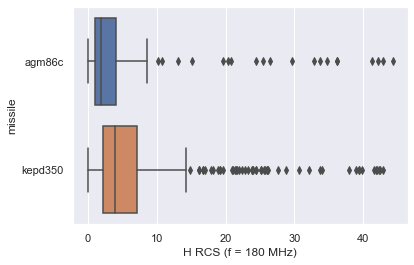

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y= "missile", x="H RCS (f = 180 MHz)", data = df)
plt.show()

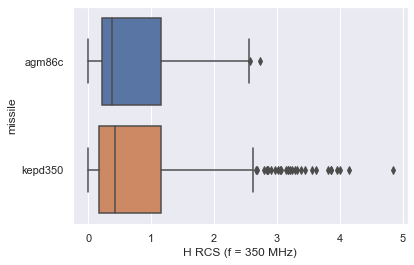

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y= "missile", x="H RCS (f = 350 MHz)", data = df)
plt.show()